# Práctica 3

Laboratorio 4

Práctica 3

Autores: Raúl Jiménez Juárez 
         Beatriz Magán Pinto 
         David Alonso Rodríguez Lepina 
         Andrés Felipe Sánchez Patarroyo
         
Asignatura: Aprendizaje estadístico & Data Mining

Fecha: 2 de diciembre de 2019

Objetivo: El SEPRONA quiere saber qué como afectan distintas características meteorológicas a la cantidad de bosque quemado en un incendio. Para ello tiene información sobre casos anteriores. La información se encuentra en el archivo incendios.csv y está compuesta por distintas características de las cuales interesa saber la influencia de la temperatura, humedad, viento y lluvia.

# Importamos librerías

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import csv
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn import preprocessing
import statsmodels.graphics.api as smg
import statsmodels.api as sm
import numpy as np 
import scipy.stats as stats

# Carga de los datos

In [2]:
df_clima = pd.read_csv('RecursosLab4/incendios.csv')
pd.options.display.max_columns = None
df_clima.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


# Información de los atributos

Los atributos de nuestro dataframe son los siguientes:
<ul>
    <li><b>X</b></li>
    <li><b>Y</b></li>
    <li><b>Month:</b> Mes</li>
    <li><b>Day:</b> Día</li>
    <li><b>FFMC:</b> Humedad de los combustibles finos. </li>
    <li><b>DMC:</b> Humedad en la capa fina de la materia orgánica.</li>
    <li><b>DC:</b> Humedad en la capa profunda de la materia orgánica.</li>
    <li><b>ISI:</b> Índice de Dispersión Inicial del Fuego.</li>
    <li><b>Temp:</b> Temperatura</li>
    <li><b>RH:</b> Humedad relativa.</li>
    <li><b>Wind:</b> Viento.</li>
    <li><b>Rain:</b> Lluvia.</li>
    <li><b>Area:</b> Área quemada.</li>
</ul>

In [3]:
df_clima.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [4]:
df_clima.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


# Preprocesamiento

## Eliminamos datos irrelevantes

Una vez vistos las variables de una forma global, eliminaremos todas aquellas que no sean relevantes para nuestro problema. En este caso, eliminaremos los atributos denominados 'X', 'Y', 'day' y 'month' ya que para este problema sólo nos importan los datos relativos al clima.

In [5]:
df_clima.drop(['X','Y','month','day'], axis=1, inplace=True)

## Búsqueda de registros repetidos

Existen 17 elementos que están duplicados por lo que se eliminarán para evitar la generación de ruido.

In [6]:
df_clima.drop_duplicates(keep = False, inplace = True) 
df_clima.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,90.590619,109.578842,547.630339,9.025549,18.840918,44.217565,4.004990,0.019162,13.143174
std,5.591709,63.546318,248.330243,4.611358,5.876331,16.414219,1.810424,0.296567,64.622131
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,61.100000,437.700000,6.400000,15.400000,32.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.710000
75%,92.900000,141.200000,713.000000,11.000000,22.800000,53.000000,5.400000,0.000000,6.610000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


# Métodos que usaremos

In [7]:
def extraerVariables(clima_df, var1, var2, var3):
    
    if(var3 == None):
        return clima_df[[var1, var2]].values, clima_df["area"].values
    
    else:
        return clima_df[[var1, var2, var3]].values, clima_df["area"].values

In [8]:
def calcularRegresion(x_entrenamiento, y_entrenamiento, x_validacion, y_validacion):
    regresionModelo = LinearRegression(normalize=True, fit_intercept=True)
    regresionModelo.fit(x_entrenamiento, y_entrenamiento)
    prediccionModelo = regresionModelo.predict(x_validacion)

    print('Intercepto: ', regresionModelo.intercept_)
    print('Coeficientes: ', regresionModelo.coef_)
    print("Residuo medio (u): {}".format(round(mean_squared_error(y_validacion, prediccionModelo),2)))
    print('Coeficiente de determinación: {}'.format(round(r2_score(y_validacion, prediccionModelo),2)))
    
    return regresionModelo, prediccionModelo

In [9]:
def representarRegresion(prediccionModelo, y_validacion):

    sns.set(style="whitegrid")

    plt.figure(figsize = (9,7))
    sns.regplot(x = prediccionModelo, y = y_validacion,
                scatter_kws = {'color': 'purple', 'alpha': 0.3},
                line_kws = {'color': '#CCCC00', 'alpha': 0.3})

    plt.title('Regresión', fontsize = 20)
    plt.xlabel('Real', size=18)
    plt.ylabel('Prediccion', size=18);

## Correlaciones

Para escoger nuestras variables, antes de nada vamos a ver como de correladas están las unas con las otras y, sobre todo, con nuestro área.

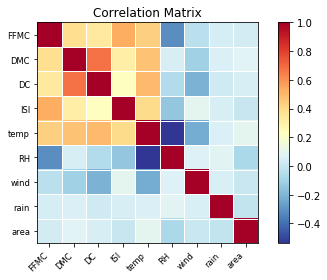

In [10]:
corr_matrix = np.corrcoef(df_clima.values.T)
smg.plot_corr(corr_matrix, xnames=df_clima.columns)
plt.show()

Observando la tabla de correlaciones, a priori no podemos observar una correlación destacable entre las diferentes características dadas por lo que la variables a escoger se harán, sobre todo, por intuición.

De todas formas, es muy curioso observar la esquina superior izquierda de la tabla y ver como de relacionadas están las variables relativas a la humedad entre ellas.

# Modelos con 2 variables

Para llevar a cabo el estudio se creará un modelo de regresión lineal múltiple, esto es debido a que hay que analizar la correlación que hay entre las diferentes características o atributos y estudiar como afectan a nuestra variable: la cantidad de área quemada en un incendio.

## Modelo 1: Lluvia y Temperatura

Antes de realizar el análisis de regresión, se compararán los valores que abarcan nuestras dos variables para saber como podrían llegar a relacionarse entre ellas y como pueden influir al análisis.

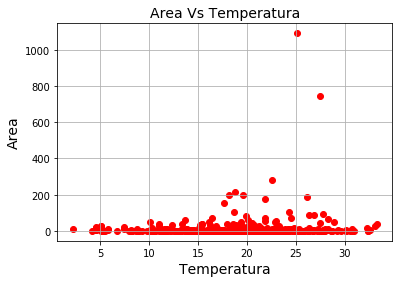

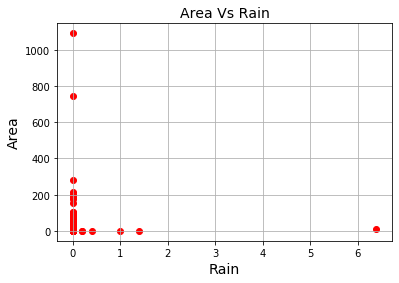

In [11]:
plt.scatter(df_clima['temp'], df_clima['area'], color='red')
plt.title('Area Vs Temperatura', fontsize=14)
plt.xlabel('Temperatura', fontsize=14)
plt.ylabel('Area', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df_clima['rain'], df_clima['area'], color='red')
plt.title('Area Vs Rain', fontsize=14)
plt.xlabel('Rain', fontsize=14)
plt.ylabel('Area', fontsize=14)
plt.grid(True)
plt.show()

Como se puede observar, las temperaturas están bastante distribuidas pero si se empieza a ver una relación creciente a mayor temperatura, es decir, cuanto mayor es el valor de la temperatura, mayor empieza a ser el área quemada. De hecho, se suele dar bastante área quemada cuando la temperatura está entre los 25 y 30 grados.

Por otro lado, con la lluvia se puede observar algo lógico y es que cuando hay lluvia nunca hay área quemada. Sim embargo, cuando la llueva es nula, el área quemada varía y aumenta su valor en diferentes cantidades.

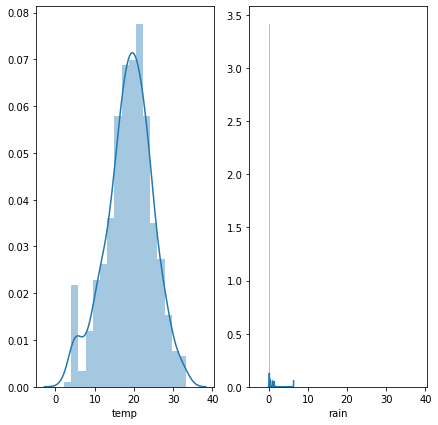

In [12]:
figura, axes = plt.subplots(1,2, figsize=(7, 7), sharex=True)
sns.distplot(df_clima["temp"], ax=axes[0])
sns.distplot(df_clima["rain"], ax=axes[1])

Como se puede observar, la temperatura suele rozar una temperatura entre los 20 y 30 grados, teniendo un ligero punto álgido en los 6/7 grados. Asimismo, las lluvias son muy poco frecuentes de forma que la mayoría de las veces es nula, esto concuerda perfectamente con los valores descritos en las tablas de arriba.

### Regresión

Primero extraeremos nuestras variables independientes (X1:temperatura; X2:lluvia) y nuestra variable dependiente (Y:area):

In [13]:
X,Y = extraerVariables(df_clima, "temp", "rain", None)

Obtenemos los sets de entrenamiento y validación:

In [14]:
X_entrenamiento, X_validacion, Y_entrenamiento, Y_validacion = train_test_split(X, Y, test_size = 0.3, random_state = 0)

Creamos el modelo y lo entrenamos:

In [15]:
regresion, prediccion = calcularRegresion(X_entrenamiento, Y_entrenamiento, X_validacion, Y_validacion)

Intercepto:  -2.634021612873015
Coeficientes:  [ 0.80684765 -2.15030296]
Residuo medio (u): 4133.62
Coeficiente de determinación: 0.02


### Representación

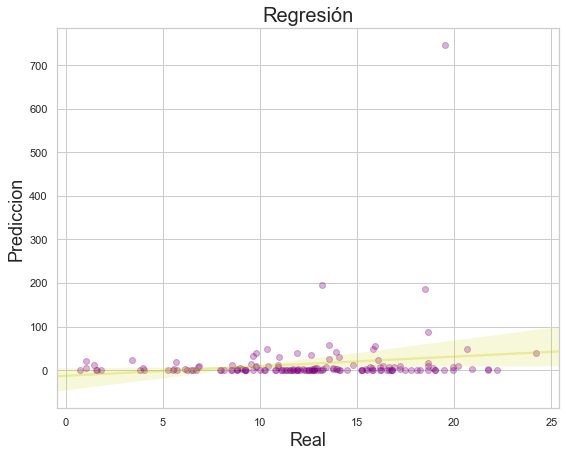

In [16]:
representarRegresion(prediccion, Y_validacion)

Con estos valores obtenidos, podríamos decir que la función de nuestra recta de regresión sería la siguiente:

                                  Y = -2.634 + X1*0.806 - X2*2.15 + 4133.62
                                    
Siendo X1 la temperatura y X2 la lluvia. Con estos datos obtenidos se puede decir que cuando la temperatura aumenta un punto el área quemada aumenta un 80%. Asimismo, cuando la lluvia aumenta un punto, el área quemada se ve reducida en un 200%, es decir, puede entenderse que cuando llueve los efectos del incendio se reducen de una forma drástica.

Asimismo, el valor residual generado es bastante alto, lo cual indica que hay muchos más factores que no estamos teniendo en cuenta y que afectan enormemente a nuestro modelo. Esto es debido a que tan sólo se han seleccionado dos variables para realizar el estudio y, es posible que si se hubiesen seleccionado más atributos, este valor se viese reducido. De la misma, el coeficiente de determinación también aumentaría y mejoraría el valor actual de 2%, un valor bastante reducido pero que, como se ha dicho, es lógico puesto que estamos teniendo en cuenta variables muy básicas.

## Modelo 2: Viento e ISI

Antes de realizar el análisis de regresión, se compararán los valores que abarcan nuestras dos variables para saber como podrían llegar a relacionarse entre ellas y como pueden influir al análisis.

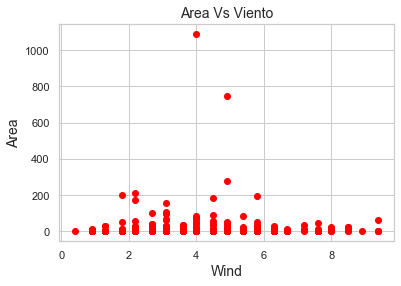

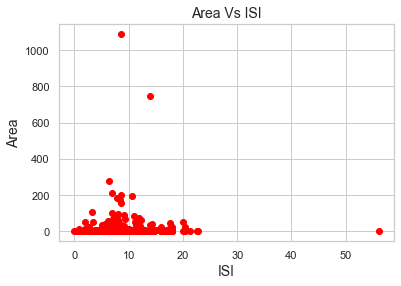

In [17]:
plt.scatter(df_clima['wind'], df_clima['area'], color='red')
plt.title('Area Vs Viento', fontsize=14)
plt.xlabel('Wind', fontsize=14)
plt.ylabel('Area', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df_clima['ISI'], df_clima['area'], color='red')
plt.title('Area Vs ISI', fontsize=14)
plt.xlabel('ISI', fontsize=14)
plt.ylabel('Area', fontsize=14)
plt.grid(True)
plt.show()

Lo cierto es que a simple vista no podemos decir nada concreto del viento, pero parece que cuando el viento toma valores entre 3 y 6 suele aumentar el área quemada considerablemente.

En cuanto al ISI (Índice de dispersión inicial del fuego), parece que tampoco hace aumentar bastante el área quemada ya que en el apenas pasa del valor 200.

### Regresión

Primero extraeremos nuestras variables independientes (X1:viento; X2:ISI) y nuestra variable dependiente (Y:area):

In [18]:
X,Y = extraerVariables(df_clima, "wind", "ISI", None)

Obtenemos los sets de entrenamiento y validación:

In [19]:
X_entrenamiento, X_validacion, Y_entrenamiento, Y_validacion = train_test_split(X, Y, test_size = 0.3, random_state = 0)

Creamos el modelo y lo entrenamos:

In [20]:
regresion, prediccion = calcularRegresion(X_entrenamiento, Y_entrenamiento, X_validacion, Y_validacion)

Intercepto:  16.652650959003303
Coeficientes:  [-0.18731222 -0.3706378 ]
Residuo medio (u): 4240.64
Coeficiente de determinación: -0.01


### Representación

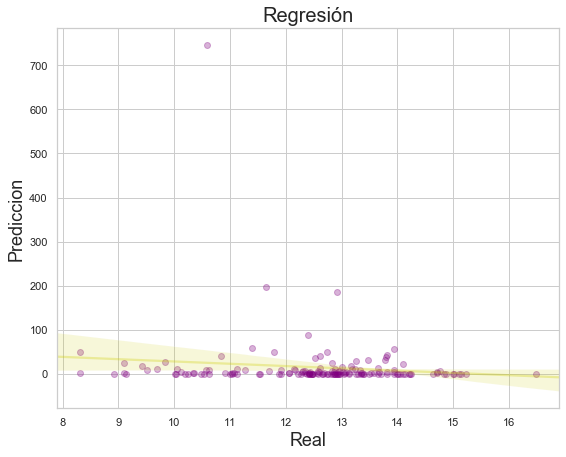

In [21]:
representarRegresion(prediccion, Y_validacion)

Con estos valores obtenidos, podríamos decir que la función de nuestra recta de regresión sería la siguiente:

                                  Y = 16.652 - X1*0.187 - X2*0.371 + 4240.64
                                    
Siendo X1 el viento y X2 el ISI. Con estos datos obtenidos se puede decir que cuando el viento aumenta un punto, el área quemada se reduce en un 18%. Asimismo, cuando el ISI aumenta un punto, el área quemada se ve reducida en un 37%, es decir, puede entenderse que cuando llueve los efectos del incendio se reducen de una forma drástica.

El valor residual sigue siendo muy alto como era de esperar. Lo realmente extraño aquí es el coeficiente de determinación, el cual da como valor -0.01 por lo que nos da a entender que nuestro modelo para este caso falla demasiado y es realmente malo. Hay que decir que se han hecho pruebas con los valores estandarizados y ha vuelto a dar el mismo valor por lo que podemos decir que no es un problema de preprocesamiento.

# Modelos con 3 variables

## Modelo 1: RH, DC, FFMC

Primero extraeremos nuestras variables independientes (X1:RH; X2:DC; X3:FFMC) y nuestra variable dependiente (Y:area):

In [22]:
X,Y = extraerVariables(df_clima, "RH", "DC", "FFMC")

Obtenemos los sets de entrenamiento y validación:

In [23]:
X_entrenamiento, X_validacion, Y_entrenamiento, Y_validacion = train_test_split(X, Y, test_size = 0.3, random_state = 0)

Creamos el modelo y lo entrenamos:

In [24]:
regresion, prediccion = calcularRegresion(X_entrenamiento, Y_entrenamiento, X_validacion, Y_validacion)

Intercepto:  16.8343114808698
Coeficientes:  [-0.17985873  0.01053479 -0.02451279]
Residuo medio (u): 4152.62
Coeficiente de determinación: 0.01


### Representación

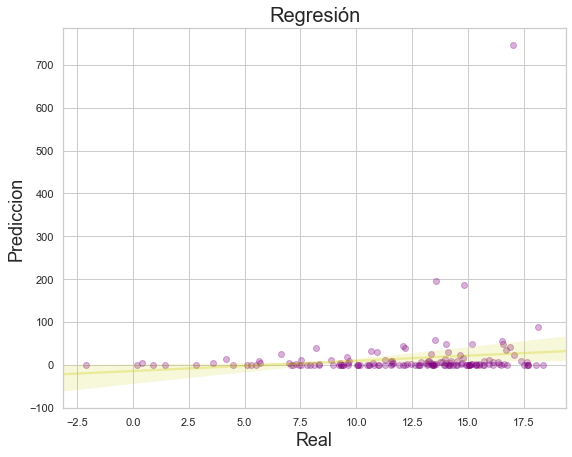

In [25]:
representarRegresion(prediccion, Y_validacion)

Con estos valores obtenidos, podríamos decir que la función de nuestra recta de regresión sería la siguiente:

                              Y = 16.834 - X1*0.179 + X2*0.010 - X3*0.024 + 4152.62

Siendo X1 el RH, X2 el DC y X3 el FFMC. Con estos datos obtenidos se puede decir que tanto la humedad relativa como la humedad de los combustibles finos están negativamente correlados con el área. De esta forma, cuando la humedad relativa aumenta un punto el área quemada disminuye tan sólo un 17% mientras que cuando el FFMC aumenta, el área disminuye en un 2%. 

Por otro lado, la capa profunda de la materia orgánica está positivamente correlada con el área quemada ya que cuando la DC aumenta, hace aumentar también el área quemada en un escaso 1%.

El valor residual sigue siendo bastante algo y está en la media con los casos anteriores, por lo que no podemos afirmar en este caso, que se hayan añadido variables que aporten una gran información al estudio. Esto se ve claramente ya que los porcentajes y correlaciones resultantes son bastante bajos.

## Modelo 1: DMC, Temperatura, RH

Primero extraeremos nuestras variables independientes (X1:DMC; X2:temperatura; X3:RH) y nuestra variable dependiente (Y:area):

In [26]:
X,Y = extraerVariables(df_clima, "DMC", "temp", "RH")

Obtenemos los sets de entrenamiento y validación:

In [27]:
X_entrenamiento, X_validacion, Y_entrenamiento, Y_validacion = train_test_split(X, Y, test_size = 0.3, random_state = 0)

Creamos el modelo y lo entrenamos:

In [28]:
regresion, prediccion = calcularRegresion(X_entrenamiento, Y_entrenamiento, X_validacion, Y_validacion)

Intercepto:  2.5334760571482846
Coeficientes:  [ 0.00769847  0.65613043 -0.07432616]
Residuo medio (u): 4121.9
Coeficiente de determinación: 0.02


### Representación

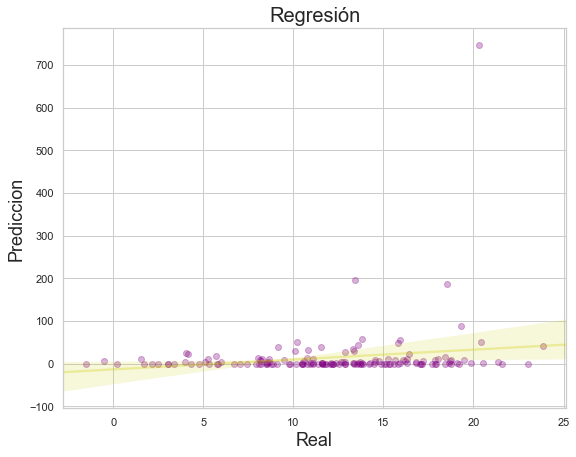

In [29]:
representarRegresion(prediccion, Y_validacion)

Con estos valores obtenidos, podríamos decir que la función de nuestra recta de regresión sería la siguiente:

                              Y = 2.533 + X1*0.007 + X2*0.656 - X3*0.074 + 4121.9

Siendo X1 el DMC y X2 la temperatura y X3 la humedad relativa. Los datos obtenidos nos confirman que la temperatura es la variable que más influye en los incendios, como es lógico haciendo que por cada punto que aumente la temperatura, el área quemada se verá incrementada en un 65%.

Por otro lado, la humedad en la capa fina de la materia orgánica (DMC) y la humedad relativa (RH), no afectan tanto al área quedama. La primera de ellas tiene una correlación positiva bastante pequeña, de forma que por cada punto que aumenta la DMC, el área se verá incrementada menos de un 1%. Asimismo, la humedad relativa como ya hemos visto anteriormente, está negativamente correlada y por cada punto que aumente, disminuirá el área quemada de un incendio en un 7%.

Por último y como siempre ha ocurrido, el valor residual generado es bastante alto, lo cual indica que hay muchos más factores que no estamos teniendo en cuenta y que afectan enormemente a nuestro modelo. Quizá se solucionaría añadiendo un mayor número de variables independientes a nuestro modelo. Por otro lado también hay que destacar que este modelo ha sido el que menor valor residual ha regresado y, por lo tanto, hemos seleccionado variables bastente influyentes como la temperatura.

El coeficiente de determinación sigue siendo bastante bajo, manteniéndose en el 2%. Esto puede ser debido a un gran número de causas, desde que nuestro modelo no tiene suficientes variales de entrenamiento, le falta información...

## Análisis de residuos

A continuación, se llevará un análisis de residuos de este último modelo creado, usando como variables independientes a DMC, temperatura y HR. El motivo de esta decisión es porque se considera el mejor modelo creado, ya que es el que tiene menor valor residual y mejor coeficiente de determinación.

### Valores Residuales de U

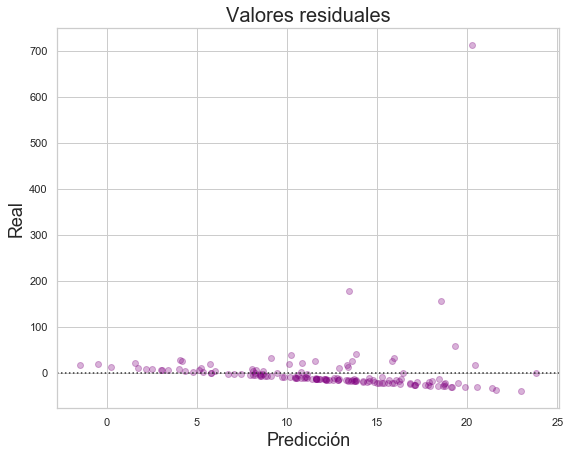

In [30]:
figura = plt.figure(figsize=(9,7))
sns.residplot(x = prediccion, y = Y_validacion, scatter_kws = {'color': 'purple', 'alpha': 0.3})

plt.title('Valores residuales', size=20)
plt.xlabel('Predicción', size=18)
plt.ylabel('Real', size=18);

### Valores Residuales de las variables explicativas

Text(0.5, 1.0, 'Distribución Normal')

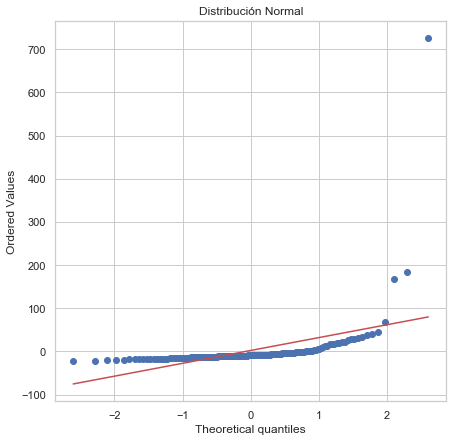

In [31]:
valoresResiduales = Y_validacion - prediccion
plt.figure(figsize=(7,7))
stats.probplot(valoresResiduales, dist="norm", plot=plt)
plt.title("Distribución Normal")

Text(0.5, 1.0, 'Frecuencia valores residuales')

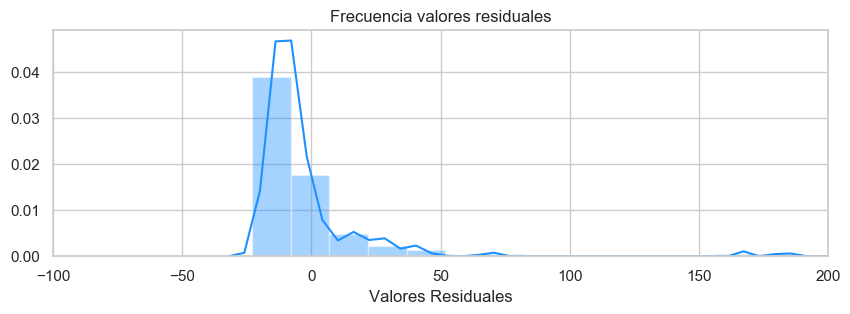

In [32]:
fig = plt.subplots(1, 1, figsize=(10, 3), sharey=True, dpi=100)
sns.distplot(valoresResiduales , color="dodgerblue", axlabel='Valores Residuales')
plt.xlim(-100,200);

plt.title("Frecuencia valores residuales")

En las anteriores gráficas podemos observar los diferentes valores que van tomando los valores residuales de nuestra regresión. Es destacable que la gran mayoría de estos valores son negativos, esto nos puede dar a entender que nuestra predicción está dando un valor mayor del que debería y por lo tanto se debería llevar a cabo un ajuste mejor del modelo.

## Intervalos de confianza

In [33]:
modelo = sm.OLS(Y_entrenamiento, X_entrenamiento).fit()
prediccion = modelo.predict(X_validacion)

intervalos = modelo.conf_int()

atributos = ['DMC', 'Temperatura', 'RH']

for i in range(len(atributos)):
    print("Intervalo de confianza de {}: {}".format(atributos[i], intervalos[i]))

Intervalo de confianza de DMC: [-0.12238775  0.13266826]
Intervalo de confianza de Temperatura: [-0.1377374  1.619809 ]
Intervalo de confianza de RH: [-0.33577279  0.2399096 ]


Gracias a la obtención de los intervalos de confianza, podemos decir que si la humedad en la capa fina de la materia orgánica (DMC) aumenta un punto, hará variar el área entre un -0.122 y 0.132 puntos. 

De la misma forma, la temperatura hará variar al área entre un -0.137 y 1.619 y, por último, la humedad relativa afectará entre un -0.335 y 0.239.

Como se puede observar y viendo todos nuestros anteriores resultados, la temperatura siempre es el valor que más influye en los incendios y, por lo tanto, en el área quemada llegando a ifluir en más de 1,5 puntos sobre el área.